# Exploratory Data Analysis For Traffic Collision Data


## 1. Introduction to the project

Traffic collisions continue to be a serious problem. According to the [annual collision report for 2015](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf) released by the Washington State Dept. of Transportation (WSDOT), there were 117,053 collisions and approximately 59.7 billion miles driven. In 2015, there were  

* 5,576,586 Licensed drivers  
* 6,252,554 Registered vehicles  
* 416,699 Speeding citations  
* 33,697 Cell phone and texting citations   

In that same year:  

* Fridays had the most collisions;   
* December had the most crashes (on average, 401 per day); and  
* Driver inattention or distraction was the most frequent contributing factor  

Like the WSDOT, the Seattle Department of Transportation (SDOT) also publishes annual reports. For example, the [2019 TRAFFIC REPORT](http://www.seattle.gov/Documents/Departments/SDOT/VisionZero/2019_Traffic_Report.pdf) is based on data from January 1 to December 31, 2018. The report states that "Traffic volumes, speeds, and reported collisions are the three cardinal pieces of data traffic engineers and planners use to evaluate changes to Seattle streets."  

Accordingly, this project looks at recent collision data to consider how much things have changed. The primary goal of the project is to identify the most dangerous sections of road in Seattle and suggest improvements.  

Our data comes from the Seattle City GIS database, and for more information, see [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).  
 

## 2. Purpose of exploratory data analysis (EDA)

EDA is a process for learning about datasets; looking for patterns, characteristics, or points of interest; answering questions; and visualizing the results. This requires the analyst:  
- to clean, reformat, and validate data;
- to visualize distributions and relationships between variables; and 
- to use regression models to predict and explain.  

Data exploration typically uses both manual data analysis and automated tools that extract data into initial reports that include data visualizations.  

Although EDA is the first step in the data analysis process, it should be repeated if additional data is added. Summarizing the size, accuracy and initial patterns in the data provides insight into potential trends and identifies areas for further analysis or data refinement. The end result provides a more useful view of the data to guide further analysis.  

### Project Specific Goals

The ultimate project goals include:  

1. Identify dangerous locations 
1. Identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
1. Examine increase or decrease in number of accidents over time
1. Identify predictors of increase or decrease in the number of accidents
1. Recommend improvements on dangerous locations

- However, as you explore the dataset, other questions are likely to pop up in your head. 
- We recommend making a note of those questions as they may guide you through your project. 
- You are welcome to answer any questions you are interested in using this dataset.  

In light of these goals, we will walk through the initial data exploration process together. 

## 3. Import packages

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell in Jupyter Notebook, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data. 

For more information about the Pandas `read_csv` method, see the [read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). There are many useful parameters that can be specified, e.g. data types, column names, null values, and etc.   

In [6]:
# To read a CSV file from the web

url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])

---------------------
### OPTIONAL -- save the CSV file 

It's good practice to save a copy of the original data, but it is not necessary for this workshop. If you want to write a copy of the df to your hard drive, follow run the cells below:

In [7]:
# To see where the CSV file will be saved, run the
# print working directory (pwd) shell command:

! pwd

/Users/megha/Work_Space/traffic_collisions_ml_team3/EDA


In [8]:
# To save the CSV file data locally in your working directory:

def save_csv_file(df, raw=True):
    
    from datetime import datetime
    
    now = datetime.now()
    
    if raw is True:
        file_name = "collision_data_{}{}{}_raw.csv".format(now.month, now.day, now.year)
    else:
        file_name = "collision_data_{}{}{}_mod.csv".format(now.month, now.day, now.year)
        
    df.to_csv(file_name, encoding="utf-8", index=False) 
    
    print("{file} saved".format(file=file_name))

    
# save_csv_file(rdf, True)  # uncomment to save CSV file

In [9]:
# the ls command shows a list of all files in the current folder (aka directory)
# the collision_data CSV file should be in the list
! ls

EDA_for_collision_data.ipynb


____

In [10]:
## To read a locally saved CSV file:

# local_file_name = "collision_data_6162020_raw.csv"  # or whatever your file name is
# rdf = pd.read_csv(local_file_name, parse_dates=["INCDTTM"])


____

In [11]:
df = rdf.copy()

In [12]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y


## 5. Look at the overall picture of the dataframe

In [13]:
df.shape

(220436, 40)

In [14]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### About the original column variables
 
__X__ - longitude, the GPS values moving left to right (East and West) along the X axis  
__Y__ - latitude, represented by horizontal lines, which go up and down (North and South)  
__OBJECTID__ - ESRI unique identifier  
__INCKEY__ - a unique key for the incident, variable type: Long  
__COLDETKEY__ - a secondary key for the incident, variable type: Long  
__REPORTNO__ - unknown  
__STATUS__ - unknown  
__ADDRTYPE__ - Collision address location type, variable type: text, 12 VARCHAR, e.g. Alley, Block, Intersection   
__INTKEY__ - a key that corresponds to the intersection associated with a collision, variable type: Double  
__LOCATION__ - a text description of location, e.g. TERRY AVE BETWEEN JAMES ST AND CHERRY ST  
__EXCEPTRSNCODE__ - unknown  
__EXCEPTRSNDESC__ - unknown  
__SEVERITYCODE__ - a code that corresponds to the severity of the collision:  
$\,\,$ 3 — fatality  
$\,\,$ 2b — serious injury  
$\,\,$ 2 — injury  
$\,\,$ 1 — prop damage  
$\,\,$ 0 — unknown  
__SEVERITYDESC__ - a description of the collision, e.g. Property Damage Only Collision, Injury Collision   
__COLLISIONTYPE__ - a description of the collision type, e.g. Parked Car, Rear Ended, Sideswipe  
__PERSONCOUNT__ - the total number of people involved  
__PEDCOUNT__ - the total number of pedestrians involved  
__PEDCYLCOUNT__ - the total number of cyclists involved  
__VEHCOUNT__ - the total number of vehicles involved  
__INJURIES__ - the total number of injuries other than fatal or disabling at the scene, including broken fingers or toes, abrasions, etc.  
__SERIOUSINJURIES__ - total number of injuries that result in at least a temporary impairment, e.g. a broken limb. It does not mean that the collision resulted in a permanent disability  
__FATALITIES__ - includes the total number of persons who died at the scene of the collisions, were dead on arrival at the hospital, or died within 30 days of the collision from collision-related injuries  
__INCDATE__ - incident date   
__INCDTTM__ - date and time of the incident, variable type: text, 30 VARCHAR  
__JUNCTIONTYPE__ - category of the junction where the collision took place  
__SDOT_COLCODE__ - the SDOT collision code    
__SDOT_COLDESC__ - a description of the collision corresponding to the collision code  
__INATTENTIONIND__ - whether or not collision was due to inattention. (Y/N)  
__UNDERINFL__ - whether or not the driver was under the influence of alcohol or drugs  
__WEATHER__ - a description of the weather, e.g. Raining, Clear  
__ROADCOND__ - a description of the road conditions, e.g. Dry, Wet  
__LIGHTCOND__ - a description of the light conditions, e.g. Dark - No Street Lights, Daylight  
__PEDROWNOTGRNT__ - whether or not the pedestrian right of way was not granted. (Y/N)  
__SDOTCOLNUM__ - unknown  
__SPEEDING__ - whether or not the driver was speeding  
__ST_COLCODE__ - code provided by the state that describes the collision, for example: 
$\,\,$ 0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$ 1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$ 2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$ 3 - Vehicle Backing Hits Pedestrian  
$\,\,$ 4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$ 5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$ 10 - Entering At Angle   
$\,\,$ 11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$ 12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$ 13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$ ...  
__ST_COLDESC__ - a description that corresponds to the state’s coding designation    
__SEGLANEKEY__ - a key for the lane segment in which the collision occurred  
__CROSSWALKKEY__ - a key for the crosswalk at which the collision occurred  

In [15]:
# Consider how many missing and unique values there are in each column

# basic approach: 
# df.info()

# more detailed approach: 
col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()    
df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary.head(25)

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.65,1
SPEEDING,object,95.52,1
EXCEPTRSNDESC,object,94.67,1
INATTENTIONIND,object,86.31,1
INTKEY,float64,67.56,7895
EXCEPTRSNCODE,object,54.62,2
SDOTCOLNUM,float64,42.29,127186
LIGHTCOND,object,11.99,9
WEATHER,object,11.95,11
ROADCOND,object,11.91,9


## 6. Understand the dataframe in relation to the questions at hand

In [16]:
# Separate the initial categorical columns from the numerical variables

numerical_features = df.select_dtypes([np.number]).columns.tolist()
print("numerical_features:\n", numerical_features)

categorical_features = df.select_dtypes(exclude = [np.number, np.datetime64]).columns.tolist()
print("\ncategorical_features:\n", categorical_features)

numerical_features:
 ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SDOT_COLCODE', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY']

categorical_features:
 ['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR']


## a. Numeric variables

Although there are many columns that contain numerical data, many of those columns use numbers for labels or identification (aka key values).  

These numerical variables provide information about what each accident looked like: 

- PERSONCOUNT (# of people invovled)
- PEDCOUNT (# of pedestirans)
- PEDCYLCOUNT (# of cyclists)
- VEHCOUNT (# of vehicles)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (# of deaths)

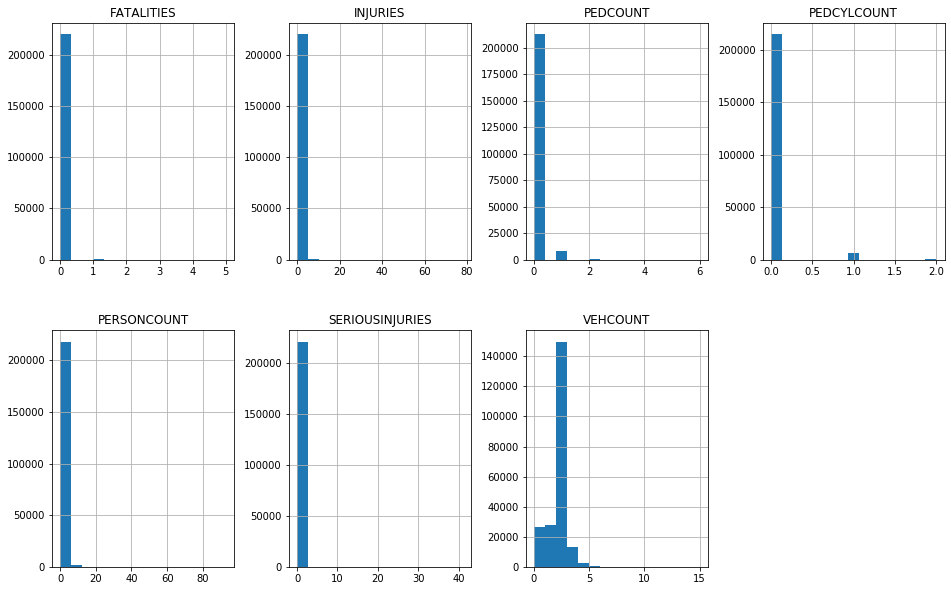

In [17]:
df_num = df.select_dtypes(include=["number"]).drop(columns=["COLDETKEY", "OBJECTID", "CROSSWALKKEY",
                                                            "SDOT_COLCODE", "INCKEY", "SDOTCOLNUM",
                                                            "SEGLANEKEY", "INTKEY", "X", "Y"])
df_num.hist(bins=15, figsize=(16, 10), layout=(2, 4));

## b. Non-numeric columns of interest

These string and categorical variables provide information about the situation or environment in which each accident occurred and could be used as predictors of accidents.   

### External factors (i.e., not dependent on the characteristics of the collision site)
- LIGHTCOND (light condition)   
- WEATHER (description of the weather conditions during the time of the collision)   

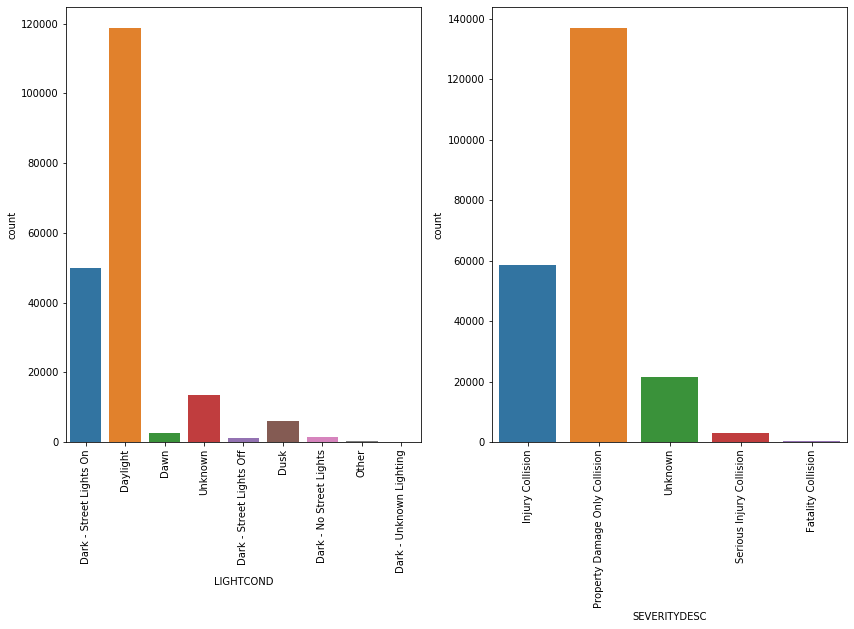

In [18]:
external_vars = ["LIGHTCOND", "SEVERITYDESC"]

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
for variable, subplot in zip(external_vars, ax.flatten()):
    _ = sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Human factors
- INATTENTIONIND (whether or not collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether pedestrian had the right of way)
- SPEEDING (whether or not speeding was a factor in the collision)
- ST_COLCODE (collision type label)

### Characteristics of the site
- ADDRTYPE (address type)
- LOCATION (described in street names)
- X & Y (GPS location) 
- CROSSWALKKEY (crosswalk label)
- JUNCTIONTYPE (junction type)
- ROADCOND (road condition)  

## 7. Cleaning at the dataframe level

It can be helpful to evaluate the dataframe as a whole and do dataframe level cleaning and formatting before drilling down into the individual variables. This includes tasks like renaming columns, removing duplicate rows, changing column datatypes, or dropping any clearly unnecessary columns (especially if memory is an issue).  

Depending on the complexity of your dataset and how familiar you are with the the domain knowledge, some of these tasks will need to be completed after you work with the individual variables, _i.e._ at the column level.  

This might also be a good point to merge multiple dataframes if you're working with multiple datasets.  

## a. Consider renaming columns

If you want to use new naming conventions for variables, it is better to make the change earlier. For example, it often makes sense to change all the column names to lowercase or add underscores between words. 

In [19]:
# Example -- how to make all column names lowercase

df.columns = map(str.lower, df.columns)
df.head(3)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


## b. Consider dropping columns

It is a bit risky to drop columns at this point, but if there are columns that are clearly unhelpful or missing a huge amount of data, then dropping those columns is reasonable.  

### Would you drop any of the columns with missing data? Why or why not?
  
How much missing data is too much? What is the right threshold?   

Let's look at the columns missing the most data. 

In [20]:
# Columns missing the most data

display(df_summary[df_summary["percent_missing_values"] > 80])

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.65,1
SPEEDING,object,95.52,1
EXCEPTRSNDESC,object,94.67,1
INATTENTIONIND,object,86.31,1


Should we drop these columns? What about `SPEEDING`?  

### Would you drop any unnecessary columns?

For example, `objectid` is essentially an index column, so you could drop it. But this might make things difficult later if you want to merge on `objectid`.  

In [21]:
df.drop(columns=["objectid"], inplace=False).head(3)

,x,y,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.340472,47.608629,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


## c. Consider dropping duplicate or unnecessary rows 

It turns out that no row in this dataset has complete data. So, we would lose the entire dataframe if we dropped any row with missing values.  

We could take a closer look and decide to drop rows depending on which columns they are missing values in (e.g., even if `X` and `Y` are missing, as long as the `LOCATION` column is not missing, we still know where the accident happened, so it's okay to keep a row that are missing `X` and `Y`).  

Feel free to try different combinations. The code below shows one way to look for duplicate values in each column:    

```
dup_col_lst = []

str_cols = list(df.select_dtypes(include="object").columns)
for col in str_cols:
    # make all string column values lowercase for uniform comparison
    df[col] = df[col].str.lower()
print("string columns reformatted: {}\n\n".format(str_cols))

for col in df.columns:
    # if the total number of unique values = total number of rows in df
    if df[col].nunique() == df.shape[0]:
        print("column {} has no duplicate rows".format(col))
    else:
        dup_col_lst.append(col)
        
print("\n {} columns have duplicate values:\n{}".format(len(dup_col_lst), dup_col_lst))
```  

Here, we concentrate on dropping rows based on the distribution of the column data. For example, it might make sense to drop all the 2003 data because there are very few data values from 2003. Keeping the 2003 data may skew the distribution and make our plots less useful.  

Before we can look at the distribution of data by year, it makes sense to add columns for `year` and `month`. 

In [22]:
# looking at incidents over time to see the annual distribution of the data

df["incdate"] = df["incdate"].astype("datetime64")
df["year"] = pd.DatetimeIndex(df.incdate).year  # alternate method
df["month"] = df["incdate"].map(lambda x: x.strftime('%m'))


df_yr = round(100*(df[["year",
                       "objectid"]].groupby(by=["year"]).count()/len(df)), 3)
df_yr = df_yr.rename(columns={"objectid": "percent_of_all_data_per_year"})
df_yr

,percent_of_all_data_per_year
year,
2003,0.000
2004,7.012
2005,7.266
2006,7.165
2007,6.842
2008,6.414
2009,6.022
2010,5.425
2011,5.632


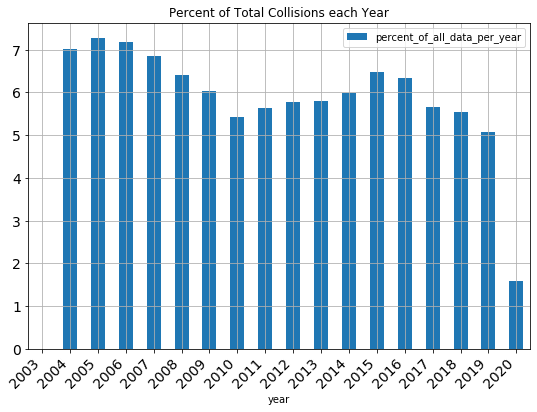

In [23]:
# bar chart of collisions per year
df_yr.plot(kind='bar', figsize=(9, 6));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(True);
plt.show();

Based on the above plot, there's good reason to remove the data from both 2003 and 2020. However, we're only going to remove the 2003 data at this point:

In [24]:
# remove 2003 data
df = df[df["year"] != 2003]
print("df shape with year and month columns, but without the 2003 data: {}".format(df.shape))

df shape with year and month columns, but without the 2003 data: (220435, 42)


## d. Consider changing variable data types

Think about how you plan to use the variable before you change its data type. Pandas data types include: "bool", "float64", "int", "object", "category", and etc. Because we did not assign variable types to columns, all our columns   

In Pandas, `categorical variables` require less memory, so (if appropriate) it can be very useful to change numeric or string (aka `object`) variables to categorical variables. However, there are additional considerations. For example, a column with null (`NaN`) values cannot be converted into a categorical variable. Also, categorical variables cannot be summed like numerical variables, so running univariate statistics on categorical variables requires an additional step.   

In [25]:
# Example - one way to filter the original variable data types

df.select_dtypes(exclude=["int"]).head(3)

,x,y,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,hitparkedcar,month
0,-122.340472,47.608629,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2004-10-14,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,N,10
1,-122.251788,47.508176,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2020-01-22,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,Y,01
2,-122.328526,47.703180,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,2020-01-05,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,N,01


In [26]:
# Example - to check to see if the column is really a float or should be an int

pd.Series(df["sdotcolnum"].unique()).sort_values(ascending=True)[0:25]

88765    1007024.0
1338     3021048.0
1205     3137016.0
328      3239035.0
8779     4001001.0
8813     4001002.0
9363     4001003.0
1756     4001004.0
1380     4001005.0
10605    4001006.0
15499    4001007.0
9026     4001008.0
10638    4001009.0
5016     4001010.0
8950     4001011.0
5986     4001012.0
14871    4001013.0
3730     4001014.0
11357    4001015.0
5965     4001016.0
15896    4001017.0
4486     4001018.0
9165     4001019.0
3386     4001020.0
1490     4001021.0
dtype: float64

Based on the above results, we might want to convert the `sdotcolnum` column from a float to an integer. Something like:   
`df["sdotcolnum"] = df["sdotcolnum"].astype(int)`  

However, since there are null values, you can't directly convert the datatype, and you'll get the error message:  
`ValueError: Cannot convert non-finite values (NA or inf) to integer`  

So, we could replace the null values with 0 and then convert, like this:  
`df["sdotcolnum"] = df["sdotcolnum"].fillna(0).astype(int)`  

or just leave it alone at this point. 

In [27]:
# Example - one way to change multiple column data types

dtypes_orig = df.dtypes
df_ = df.copy() 

for col in df_.columns:
    
    if col.lower() in ["status", "addrtype", "severitycode", "exceptrsncode",
                       "underinfl", "speeding", "hitparkedcar"]:
        # change to categorical data type
        df_.fillna({col: "unknown"}, inplace=True)
        df_[col] = pd.Series([str(word).lower() for word in df[col]])
        df_[col] = df[col].astype("category")
        
    elif col.lower() in ["sdot_colcode", "sdotcolnum"]:
        df_[col] = df[col].fillna(0).astype(int)
        
    elif col.lower() in ["x", "y"]:
        df_[col] = df[col].astype("float")
        
    elif col.lower() in ["incdttm"]:
        df_[col] = pd.to_datetime(arg=df[col])
        
    else:
        continue
        
        
dtypes_new = df_.dtypes
display(pd.DataFrame({"original_data_type": dtypes_orig,
                      "new_data_type": dtypes_new}))

,original_data_type,new_data_type
x,float64,float64
y,float64,float64
objectid,int64,int64
inckey,int64,int64
coldetkey,int64,int64
reportno,object,object
status,object,category
addrtype,object,category
intkey,float64,float64
location,object,object


## 8. Understand individual columns

In this section, we will examine some of the columns by answering questions that align with the three of the goals mentioned above.

- Goal 1: Identify dangerous locations
- Goal 2: Identify predictors of accidents 
- Goal 3: examine increase or decrease in number of accidents over time

## Goal 1: Which locations are dangerous?

### Q1. How do we decide that a location is dangerous?

We could define dangerousness by:
- Severity of accidents
- Number of accidents

Let's take a look at the outcome columns to understand what these accidents look like.

In [28]:
num_columns = [
    'personcount',
    'pedcount',
    'pedcylcount',
    'vehcount',
    'injuries',
    'seriousinjuries',
    'fatalities']

In [29]:
np.round(df[num_columns].describe(), 3)

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,220435.000,220435.000,220435.000,220435.000,220435.000,220435.000,220435.000
mean,2.227,0.038,0.027,1.731,0.374,0.015,0.002
std,1.471,0.202,0.164,0.829,0.732,0.158,0.044
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
50%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
75%,3.000,0.000,0.000,2.000,1.000,0.000,0.000
max,93.000,6.000,2.000,15.000,78.000,41.000,5.000


- There is no missing values for these columns
- There isn't a lot of variability in the values for these columns
- There seem to be some outliers (e.g., `personcount`, `injuries`)
- For a quick review of outliers, https://en.wikipedia.org/wiki/Outlier

Let's take a look at these columns with some visualization, starting with the first column `personcount`.

In [30]:
# Count the number of cases per number of persons involved in the accident
personcountdf = df['personcount'].value_counts().to_frame('count')
personcountdf.head()

,count
2,118466
3,36376
0,24927
4,14965
1,13827


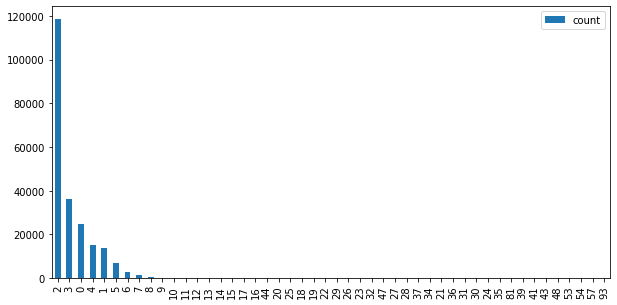

In [31]:
# Take a look at the distribution using a bar graph

personcountdf.plot.bar(figsize=(10, 5))
plt.show()

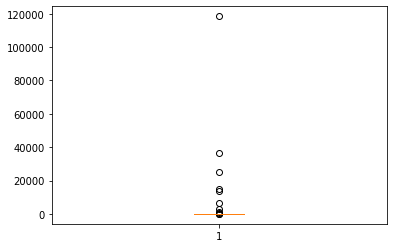

In [32]:
# Take a look at the distribution using a box plot

plt.boxplot(personcountdf['count'])
plt.show();

Let's combine these three steps in a for loop so that we can create a bar chart and box plot for each of the numeric columns side by side.

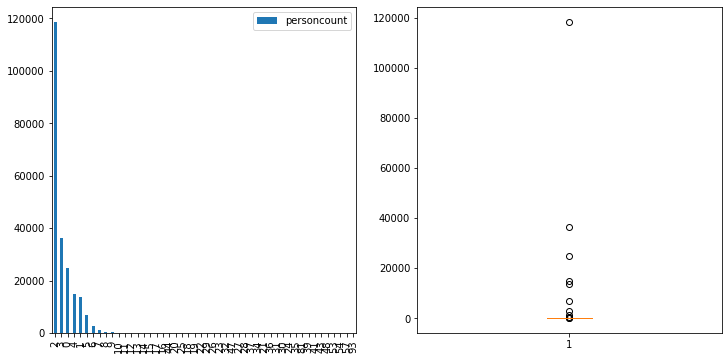

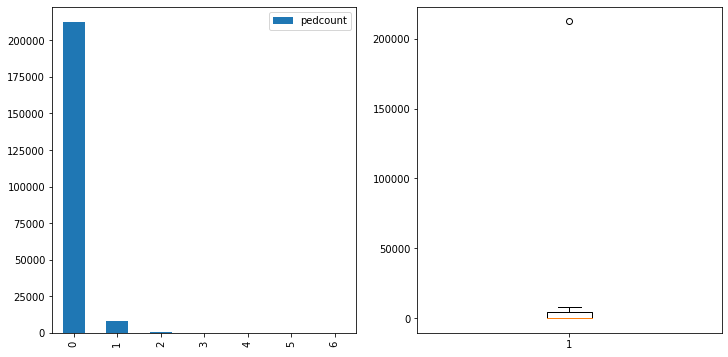

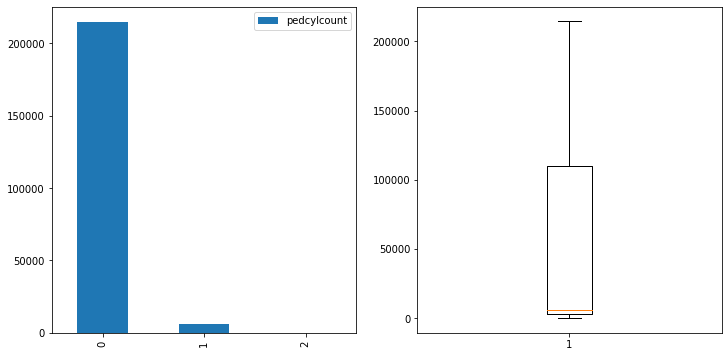

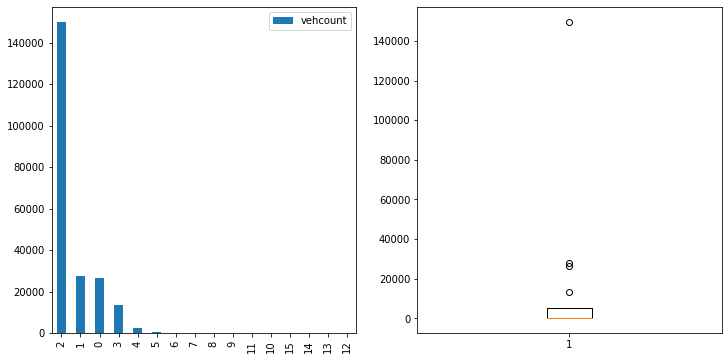

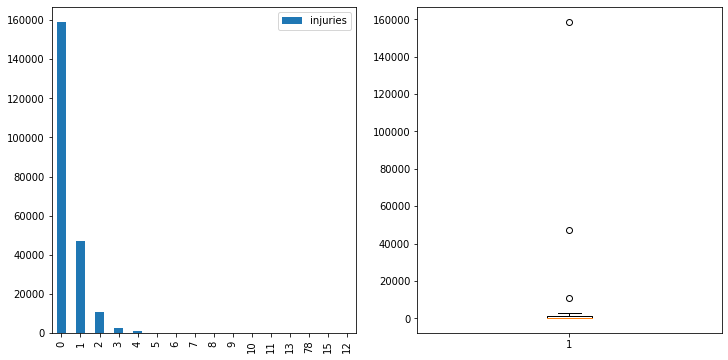

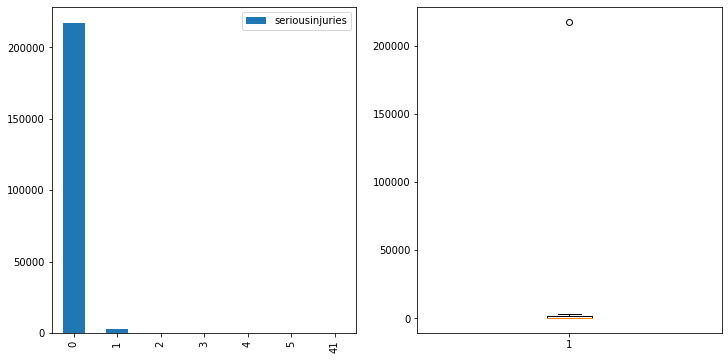

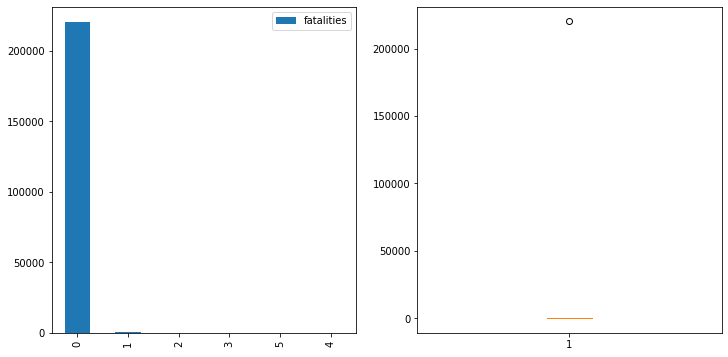

In [33]:
for column in num_columns:
    # Specify the size of each figure
    fig = plt.figure(figsize=(12, 6))
    # Creat a subplot on the left and right each
    left = fig.add_subplot(1, 2, 1)
    right = fig.add_subplot(1, 2, 2)
    # Make a temporary df by counting the number of each value
    tempdf = df[column].value_counts().to_frame()
    # Assign '_' to the bar plot and box plot each to avoid printing a long unnecessary text
    _ = tempdf.plot.bar(ax=left)
    _ = right.boxplot(tempdf[column])
    fig.show()

It seems that the most common accidents involve:

- 2 people and 2 vehicles
- 0 pedestrians or cyclists
- 0 to 1 injuries
- 0 deaths

### How do you deal with outliers in your data analysis?

- It's important to think if it makes sense to handle outliers or keep them as they are.
- Look at the distribution (e.g., is it normal?) for each column and think whether or not you will be using the column for later analyses (e.g., is there enough variability to explain by other columns?).
- You could consider transforming the data (e.g., log transformation).
- You could replace outliers with the mean or median of the column.  

Let's now get back to Q1. how to define dangerousness:

- It might be difficult to use `pedcount`, `pedcylcount`, `seriousinjuries`, and `fatalities` as measures of dangerous locations due to the lack of variability in these columns.
- Let's try using the number of accidents as a way to measure a location's dangerousness

### Q2. Which locations have had the highest total number of accidents?

In [34]:
locdf = df['location'].value_counts().to_frame('count')
locdf = locdf.head(7)
locdf

,count
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,295
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280
6TH AVE AND JAMES ST,272
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,269
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256


- We need to remember that the heavier the traffic is, the more likely there is to be an accident. 
- So these locations may have the highest numers of accidents, but also may have the highest amounts of overall traffic. 

Above, we defined dangerousness by the **total** number of incidents. Let's try looking into the number of **severe** incidents.

### Q3. Which locations have the highest numbers of severe incidents?

First, let's take a look at the categories of `severitycode`.

In [35]:
# Re-labeling serverity so that the categories are self-explanatory
df['severitycode'] = df['severitycode'].map({
    '0': 'Unknown', 
    '1': 'Prop_damage_only', 
    '2': 'Injury',
    '2b': 'Serious_injury', '3': 'Fatality'
})

In [36]:
df['severitycode'].value_counts(dropna=False).to_frame('count')

,count
Prop_damage_only,137026
Injury,58472
Unknown,21508
Serious_injury,3082
Fatality,346
NaN,1


In [37]:
# Select incidents that involved injuries and deaths 
severity = ['Fatality', 'Serious_injury', 'Injury']
sevdf = df[(df['severitycode'].isin(severity))]
# Group the dataframe by location to rank locations by the number of severe incidents
sevcdf = sevdf['location'].value_counts().to_frame('count')
# Select the top 7 locations
most_sev = sevcdf.head(7)
most_sev

,count
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,126
6TH AVE AND JAMES ST,112
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,97
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,96
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,96
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,93
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,82


Let's compare the locations with the highest numbers of **severe** incidents and locations with the highest numbers of **total** incidents.

In [38]:
# These are the locations with highest number of severe incidents

mostsevlocations = list(most_sev.index)
sorted(mostsevlocations, key=str.lower)

['6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP']

In [39]:
# These are the locations with highest total number of incidents (we found them earlier)
manyaccident_locations = list(locdf.index)
sorted(manyaccident_locations, key=str.lower)

['6TH AVE AND JAMES ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N']

- 5 locations appear on both lists
- 2 locations only appear on the list of locations with most severe incidents
- 2 other locations only appear on the list of locations with highest number of incidents
- Looks like there is some overlap between the 2 lists
- Either the total number of accidents or total number of severe accidents could be an indicator of dangerousness
- Caution: Locations may not be entered in a standardized manner. Using coordinates may be a better way to identify dangerous locations.

## Goal 2: identify predictors of accidents

Now let's try to find what contributes to accidents by looking at: 
- External factors
- Human factors
- Characteristics of the collision site

### External factors

Let's take a look at `lightcond`.

There are a lot of subcategories for `dark` conditions. Let's try combining them.

In [40]:
df['lightcond'] = df['lightcond'].replace({
   'Dark - No Street Lights': 'Dark',
   'Dark - Street Lights Off': 'Dark',
   'Dark - Street Lights On': 'Dark',
   'Dark - Unknown Lighting': 'Dark'
})

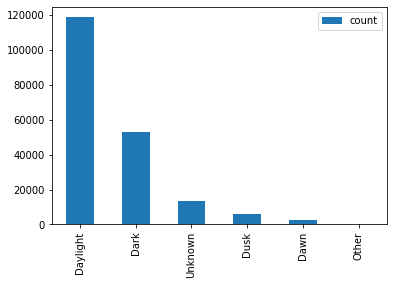

In [41]:
df['lightcond'].value_counts().to_frame('count').plot.bar();

**Exercise**
Check the frequencies for `weather`

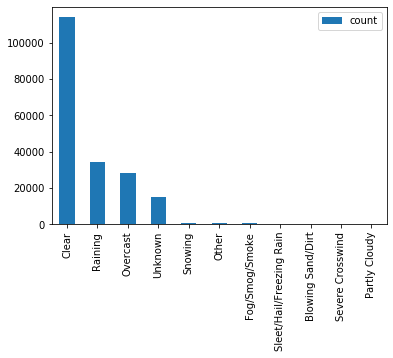

In [42]:
df['weather'].value_counts().to_frame('count').plot.bar();

**End of exercise**

- Most incidents happened in daylight and a clear weather. 
- Is a bad weather not a predictor of accidents then?

### Human factors

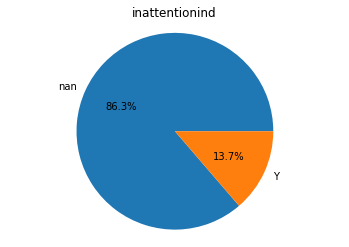

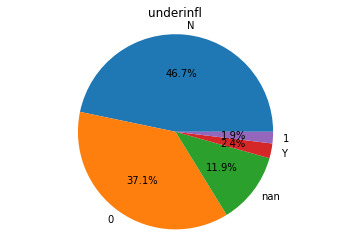

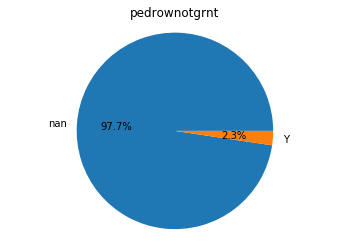

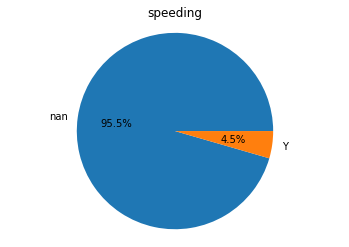

In [43]:
human_factors = ['inattentionind', 'underinfl', 'pedrownotgrnt', 'speeding']
for factor in human_factors:
    pie_series = df[factor].value_counts(dropna=False) 
    fig1, ax1 = plt.subplots()
    _ = ax1.pie(pie_series.values, labels=pie_series.index, autopct='%1.1f%%')
    _ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    _ = plt.title(factor)
    plt.show()

- As you can see, there are a lot of missing data in these columns. This is something important to keep in mind when we conduct an analysis later. 
- There are fewer missing values for `underinfl` (whether the driver was under the influence) but there are `0`s and `1`s vs. `n`s and `y`s. If we want to use this column for an analysis later, we should combine these categories, assuming that `0`s = `n`s and `1`s = `y`s.
- Under this assumption, in most cases, drivers were NOT under the influence

### Characteristics of the collision site

**Exercise**
In the cell below, the list `site_characteristics` contains all the columns that describes the characteristics of the collision site. Modeling after the bar graphs we saw for the `External Factors` above, create a bar graph for each column. You are welcome to do so for individual column or using a for loop.

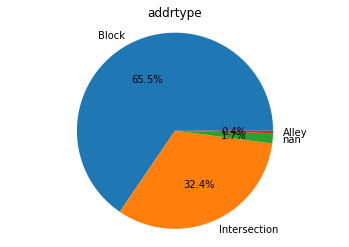

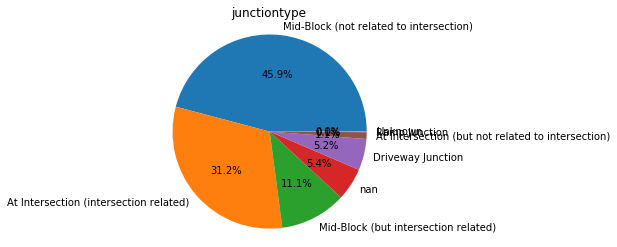

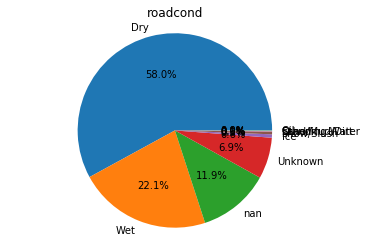

In [44]:
site_characteristics = ['addrtype', 'junctiontype', 'roadcond']
for factor in site_characteristics:
    pie_series = df[factor].value_counts(dropna=False) 
    fig1, ax1 = plt.subplots()
    _ = ax1.pie(pie_series.values, labels=pie_series.index, autopct='%1.1f%%')
    _ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    _ = plt.title(factor)
    plt.show()

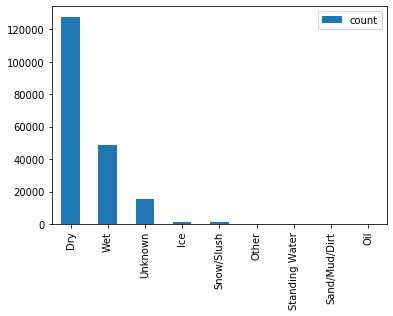

In [45]:
df['roadcond'].value_counts().to_frame('count').plot.bar();

**End of exercise**

More than half of the incidents happened:
- mid-block rather than an intersection
- on a dry road

So far, we found that many incidents happened
- in daylight
- in a clear weather
- mid-block
- on a dry road

Given these findings, can we rule out darkness and bad weather as predictors of accidents??

### Q3. Can we predict severity from junction type?

Note: SEVERITYCODE and SEVERITYDESC have the same information

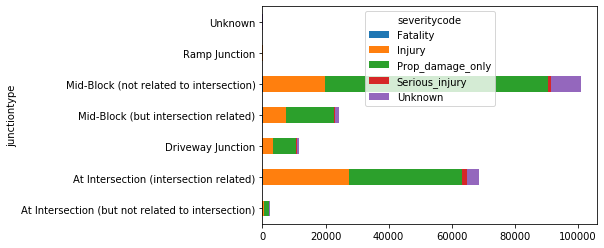

In [46]:
df.pivot_table(index='junctiontype',
               columns='severitycode', aggfunc='size').plot.barh(stacked=True)

- Again, most accidents happened mid-block; a large portion of them only resulted in property damage.
- Intersection related accidents were also common; the majority only resulted in property damage but some accidents involved injuries as well.

## Goal 3: Examine increase or decrease in number of accidents over time

So far, we've looked at the dataset without considering the longitudinal aspect of it. Let's take a look at the change over time in the number of accidents.

### Q4. Has the number of accidents increased or decreased over time?

Let's first take a look at the general trend over time in the overall number of accidents

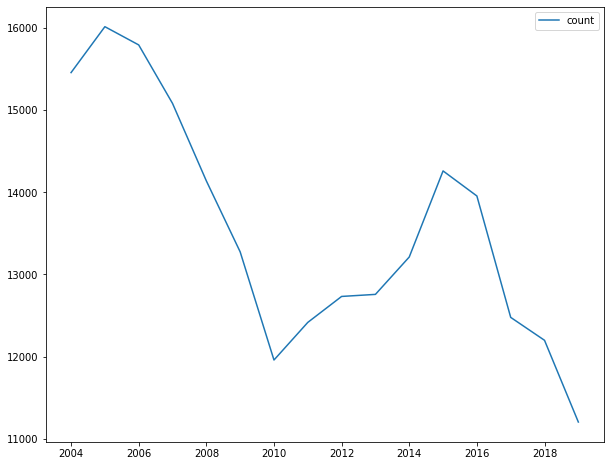

In [47]:
yeardf = df['year'].value_counts(dropna=False).to_frame('count')
# The step above automatcially makes 'year' the index, and sorts the dataframe by 'count'
# So, sort the dataframe by index so that it is sorted by year
yeardf = yeardf.sort_index()
# Exclude 2020 because the data is incomplete
yeardf = yeardf.loc[yeardf.index < 2020] 
yeardf.plot(figsize=(10, 8))

- It looks like there was a decline from 2004 to 2010, then an increase to 2015, then a decline again toward 2019.
- What might have contributed to these declines and increase in accidents? Change in the volume of traffic? Did the City make changes to the location?

Would we see a similar pattern for the dangerous locations we have identified earlier? Let's take a look. 

### Q5. How has the number of incidents changed over time for the most dangerous locations?

Let's look at the changes over time in the locations with the highest number of incidents.

In [48]:
manyaccident_df = df[df['location'].isin(locdf.index)]
manyaccident_df.head()

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month
66,-122.344896,47.717173,67,328194,329694,3854704,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,Prop_damage_only,Property Damage Only Collision,Angles,3,0,0,2,0,0,0,2020-01-22,2020-01-22 17:50:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark,NaN,NaN,NaN,10,Entering at angle,0,0,N,2020,01
383,-122.344896,47.717173,384,1053,1053,3501458,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,Prop_damage_only,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2013-03-26,2013-03-26 16:41:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N,2013,03
465,-122.344896,47.717173,466,328402,329902,3854705,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,Injury,Injury Collision,Angles,2,0,0,2,1,0,0,2020-01-23,2020-01-23 18:30:00,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark,NaN,NaN,NaN,10,Entering at angle,0,0,N,2020,01
541,-122.344896,47.717173,542,1308,1308,3503142,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,Injury,Injury Collision,Sideswipe,2,0,0,2,1,0,0,2013-04-01,2013-04-01 10:45:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,12,From same direction - both going straight - on...,0,0,N,2013,04
573,-122.328079,47.604161,574,328750,330250,EA12333,Matched,Intersection,29973.0,6TH AVE AND JAMES ST,,NaN,Prop_damage_only,Property Damage Only Collision,Left Turn,3,0,0,2,0,0,0,2020-02-05,2020-02-05 20:33:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N,2020,02


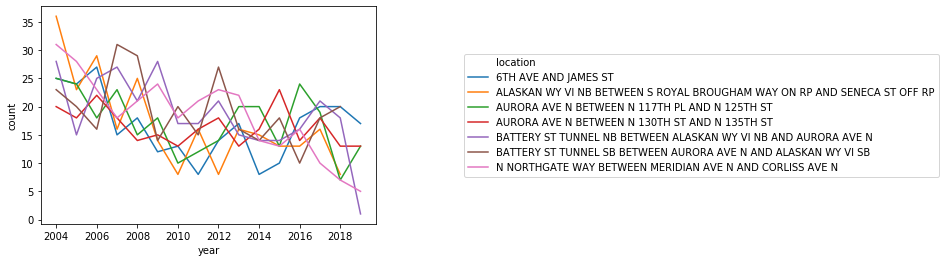

In [49]:
# First get the number of total accidents for each year for each of the 7 locations 
manyaccident_year_data = manyaccident_df.groupby(
    ['location', 'year']).size().to_frame('count').reset_index()
# Let's exclude 2020 since data are still coming in
manyaccident_year_data = manyaccident_year_data[(manyaccident_year_data['year'] < 2020)]
g = sns.lineplot(x="year", y="count", hue="location", data=manyaccident_year_data)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

- In general, there is a downward trend toward 2018
- Green line is going up after 2018
- Purple line is going down after 2018
- What might explain these different patterns in different locations?

## 9. Understand relationships between columns


## a. Scatter plots

Scatter plots are a quick way to look for outliers. For example, the scatter plots show that the outlier collision where five people died involved only five vehicles, but more than 80 people.  

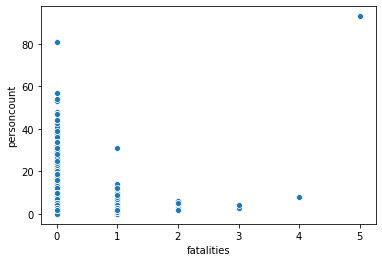

In [50]:
sns.scatterplot(x=df["fatalities"], y=df["personcount"]);

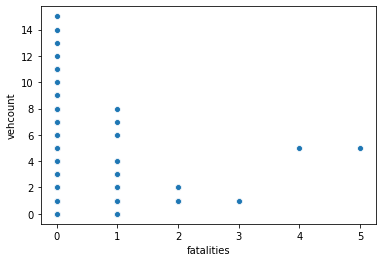

In [51]:
sns.scatterplot(x=df["fatalities"], y=df["vehcount"]);

Here it looks like the collisions with the most fatalities tend to occur in September. So, maybe the collisions involved school buses?

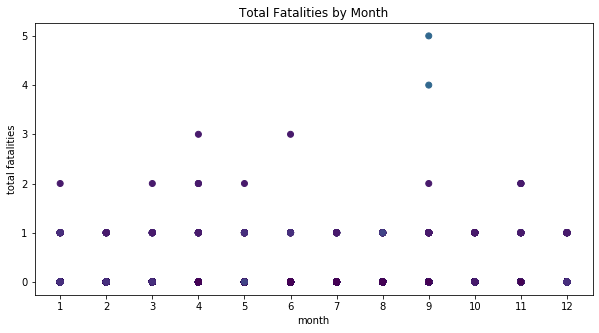

In [52]:
# this example just uses matplotlib instead of seaborn to show the difference

plt.figure(figsize=(10, 5))
plt.scatter(df["month"].astype(int), df["fatalities"], c=df["vehcount"])
plt.xticks(list(range(1, 13)));
plt.xlabel("month");
plt.ylabel("total fatalities");
plt.title("Total Fatalities by Month")
plt.show();

Let's combine all collisions with injuries

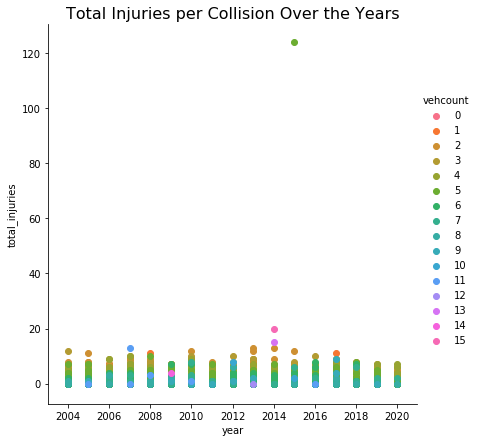

In [53]:
df_ = pd.DataFrame({"year": df["year"],
                    "month": df["month"],
                    "vehcount": df["vehcount"],
                    "injuries": df["injuries"],
                    "seriousinjuries": df["seriousinjuries"],
                    "fatalities": df["fatalities"]}) 
for col in df_:
    df_[col] = df_[col].astype(int)

df_["total_injuries"] = df_["injuries"] + df_["seriousinjuries"] + df_["fatalities"]
df_.head()

sns.FacetGrid(df_, hue="vehcount", size=6) \
   .map(plt.scatter, "year", "total_injuries") \
   .add_legend();
plt.title("Total Injuries per Collision Over the Years", fontsize = 16);

<Figure size 1080x720 with 0 Axes>

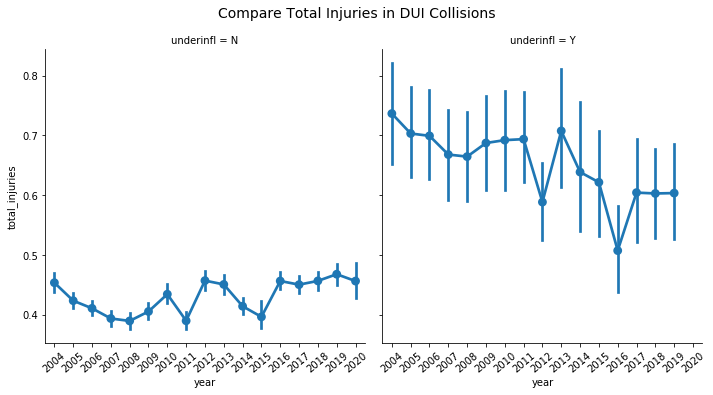

In [54]:
# comparing injuries in collisions involving drugs or alcohol

df_["underinfl"] = df["underinfl"].replace({"0": "N", "1": "Y"})

plt.figure(figsize=(15, 10));
g = sns.factorplot(data=df_, x="year", y="total_injuries", col="underinfl");
g.set_xticklabels(rotation=40);
plt.suptitle("Compare Total Injuries in DUI Collisions", y=1.05, fontsize = 14);

## b. Tables

A frequency table can show the distribution between two categorical variables.  

The crosstab() function can be used to create the two-way table between two variables.  

The chi-square test of independence can be used to determine whether there is an association between two or more categorical variables.  

In [55]:
pd.crosstab(df["addrtype"], df["severitydesc"])

severitydesc,Fatality Collision,Injury Collision,Property Damage Only Collision,Serious Injury Collision,Unknown
addrtype,,,,,
Alley,0,82,672,5,110
Block,190,30263,97212,1518,15161
Intersection,156,27936,37405,1556,4462


In [56]:
pd.crosstab(df["roadcond"], df["severitydesc"])

severitydesc,Fatality Collision,Injury Collision,Property Damage Only Collision,Serious Injury Collision,Unknown
roadcond,,,,,
Dry,267,40314,84954,2218,0
Ice,1,275,937,18,0
Oil,0,24,40,0,0
Other,0,43,90,3,0
Sand/Mud/Dirt,0,23,54,0,0
Snow/Slush,0,167,839,8,0
Standing Water,0,30,86,3,0
Unknown,1,754,14344,30,0
Wet,69,15869,31956,757,2


In [57]:
from scipy.stats import chi2_contingency

pd.crosstab(df["junctiontype"], df["severitydesc"])

chi2_contingency(pd.crosstab(df["junctiontype"], df["severitydesc"]))

(9825.598121181154,
 0.0,
 24,
 array([[4.12676259e+00, 6.94611894e+02, 1.56794251e+03, 3.66504365e+01,
         1.90668393e+02],
        [1.13859928e+02, 1.91647711e+04, 4.32605021e+04, 1.01120817e+03,
         5.26065871e+03],
        [1.90138849e+01, 3.20039506e+03, 7.22422912e+03, 1.68865343e+02,
         8.78496595e+02],
        [4.03228058e+01, 6.78708791e+03, 1.53204455e+04, 3.58113266e+02,
         1.86303050e+03],
        [1.67327482e+02, 2.81643678e+04, 6.35752280e+04, 1.48606204e+03,
         7.73101468e+03],
        [3.14388489e-01, 5.29175060e+01, 1.19450312e+02, 2.79213429e+00,
         1.45256595e+01],
        [3.47482014e-02, 5.84877698e+00, 1.32024029e+01, 3.08604317e-01,
         1.60546763e+00]]))

## c. Correlations between variables

Covariance is a statistical measure of association between two variables X and Y.  

Correlation quantifies how close two variables are to having a linear relationship with each other.  

More generally, correlation is used to describe a dependent statistical relationship. Dependence or association is any statistical relationship, whether causal or not, between two variables. Random variables are dependent if they do not satisfy the statistical property of probabilistic independence.  

For more details, this [Oracle AI and Data Science Blog](https://blogs.oracle.com/datascience/introduction-to-correlation) provides a nice introduction to correlation.  

There are many ways to visualize correlation.

In [58]:
df_corr = df.drop(["objectid", "intkey", "inckey", "sdotcolnum", "sdot_colcode"], axis=1)
df_corr.corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"),
                                                                         axis=1)

,x,y,coldetkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,seglanekey,crosswalkkey,year
x,1.0,-0.16,0.0059,0.019,0.012,-0.0017,0.0059,0.015,-0.0053,0.00046,-0.00039,0.014,0.0061
y,-0.16,1.0,-0.025,-0.03,0.009,0.024,-0.016,0.0018,-0.0023,-0.0045,0.0037,0.007,-0.024
coldetkey,0.0059,-0.025,1.0,-0.067,0.022,0.025,-0.11,-0.0049,-0.0038,-0.00025,0.015,0.044,0.97
personcount,0.019,-0.03,-0.067,1.0,0.011,-0.0093,0.56,0.32,0.11,0.046,-0.0084,-0.01,-0.067
pedcount,0.012,0.009,0.022,0.011,1.0,-0.016,-0.16,0.17,0.13,0.073,0.0012,0.55,0.022
pedcylcount,-0.0017,0.024,0.025,-0.0093,-0.016,1.0,-0.15,0.12,0.062,0.011,0.46,0.1,0.028
vehcount,0.0059,-0.016,-0.11,0.56,-0.16,-0.15,1.0,0.14,-0.0033,-0.01,-0.076,-0.12,-0.11
injuries,0.015,0.0018,-0.0049,0.32,0.17,0.12,0.14,1.0,0.28,0.067,0.059,0.1,-0.0044
seriousinjuries,-0.0053,-0.0023,-0.0038,0.11,0.13,0.062,-0.0033,0.28,1.0,0.17,0.032,0.056,-0.0049
fatalities,0.00046,-0.0045,-0.00025,0.046,0.073,0.011,-0.01,0.067,0.17,1.0,0.0051,0.032,-0.0012


In [61]:
pwd

'/Users/megha/Work_Space/traffic_collisions_ml_team3/EDA'

In [68]:
# save the correlation table
corr_table =df_corr.corr()
corr_table.to_csv('/Users/megha/Work_Space/traffic_collisions_ml_team3/data_sources/corr.csv',encoding="utf-8")

In [54]:
# example -- correlation table 

df_corr.corr()[df_corr.corr() > .1]

,x,y,coldetkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,seglanekey,crosswalkkey,year
x,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coldetkey,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974413
personcount,NaN,NaN,NaN,1.000000,NaN,NaN,0.557842,0.319253,0.107650,NaN,NaN,NaN,NaN
pedcount,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.167327,0.132415,NaN,NaN,0.553912,NaN
pedcylcount,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.122372,NaN,NaN,0.456357,0.104206,NaN
vehcount,NaN,NaN,NaN,0.557842,NaN,NaN,1.000000,0.142620,NaN,NaN,NaN,NaN,NaN
injuries,NaN,NaN,NaN,0.319253,0.167327,0.122372,0.142620,1.000000,0.279922,NaN,NaN,0.100811,NaN
seriousinjuries,NaN,NaN,NaN,0.107650,0.132415,NaN,NaN,0.279922,1.000000,0.173749,NaN,NaN,NaN
fatalities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173749,1.000000,NaN,NaN,NaN


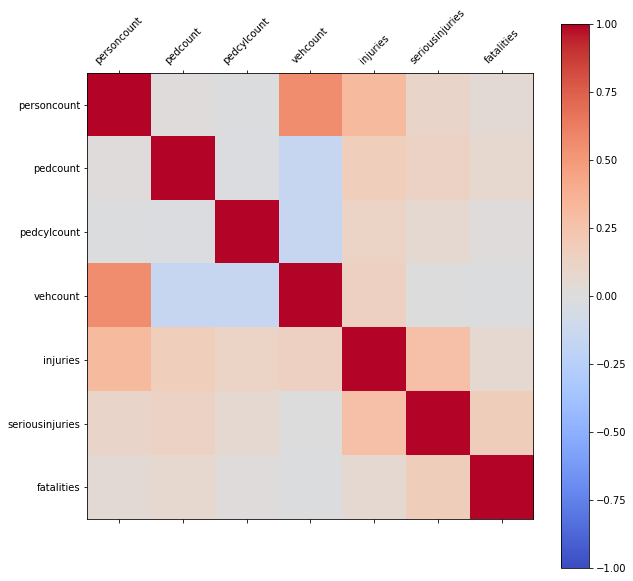

In [55]:
# correlation between numeric variables

corr = df[num_columns].corr()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(num_columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(num_columns, rotation=45, horizontalalignment="center")
ax.set_yticklabels(num_columns)
plt.show();

In [56]:
# example -- how to save a plot image, here we save the correlation plot from above

fig.savefig("corr_plot.png",
            dpi=300, 
            format='png', 
            bbox_inches='tight')